# Team- Code_Stunters

In [47]:
import pandas as pd
from ordered_set import OrderedSet
import pickle as pkl
import seaborn as sns
import matplotlib.pyplot as plt

In [48]:
routes = pd.read_excel('route.xlsx')

In [71]:
starting_location = 'Koramangala'
ending_location = "Devarabisanahalli"

In [72]:
buses_crossing_from_start = []
buses_crossing_from_end = []


In [73]:
all_bus_num = routes.columns

In [74]:
for bus_num in all_bus_num:
    bus_route = OrderedSet(routes[bus_num])
    if starting_location in bus_route:
        buses_crossing_from_start.append(bus_num)
    if ending_location in bus_route:
        buses_crossing_from_end.append(bus_num)

In [75]:
routes_connecting_ending_loc = []

In [76]:
for bus_num in buses_crossing_from_end:
    route = routes[bus_num].values.tolist()
#     print(route)
    routes_connecting_ending_loc = routes_connecting_ending_loc + route

In [77]:
routes_connecting_ending_loc = OrderedSet(routes_connecting_ending_loc)

In [78]:
'Koramangala' in routes_connecting_ending_loc

False

In [79]:
len(routes_connecting_ending_loc)

444

In [80]:
intersected_buses = {}

In [81]:
with open('Dictionary_busroute.pkl','rb') as f:
    bus_route_dict = pkl.load(f)

In [82]:
for route in routes_connecting_ending_loc:
    bus_list = bus_route_dict[route]
    if len(set(buses_crossing_from_start).intersection(set(bus_list))) != 0:
        intersected_buses[route] = len(set(buses_crossing_from_start).intersection(set(bus_list)))

In [83]:
plot = pd.DataFrame.from_dict(intersected_buses,orient='index')

In [84]:
plot.head()

,0
Chikkalasandra,1
Chikkalasandra Arali Mara,2
Gowdanapalya,2
Gowdanapalya Prarthana School,2
Kadirenahalli,2


In [85]:
plot['Place'] = plot.index

In [86]:
plot.columns

Index([0, 'Place'], dtype='object')

In [87]:
plot.drop('Nan',axis=0,inplace=True)

In [88]:
plot.sort_values(0,ascending=False,inplace=True)

In [89]:
plot.iloc[:10]

,0,Place
Agara (Sarjapur Road),56,Agara (Sarjapur Road)
Iblur,48,Iblur
Bellandur Gate,44,Bellandur Gate
Kaikondrahalli,42,Kaikondrahalli
Mori Gate,39,Mori Gate
Dodda Kannalli,38,Dodda Kannalli
Corporation,33,Corporation
Carmelaram Railway Gate,32,Carmelaram Railway Gate
Kodathi Gate,31,Kodathi Gate
Kanteerava Stadium,31,Kanteerava Stadium


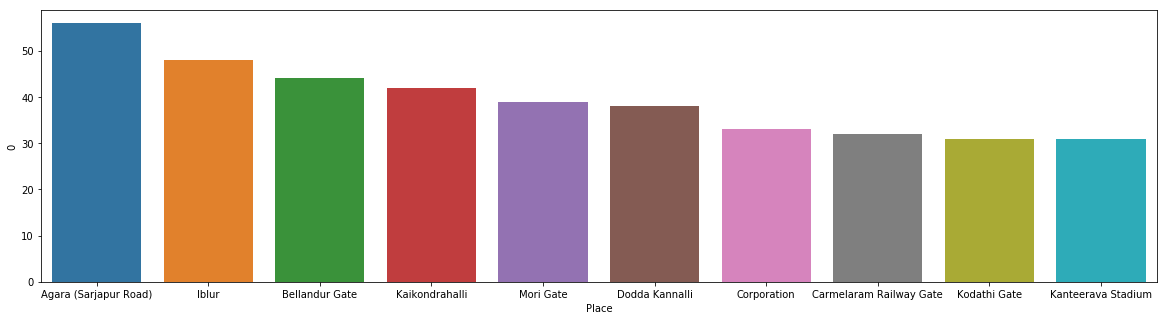

In [90]:
plt.figure(figsize=[20,5])
sns.barplot(x='Place',y=0,data=plot.iloc[:10])

In [69]:
all_bb = []
bus = set(bus_route_dict['Devarabisanahalli'])
for i in plot['Place'].values.tolist()[1:9]:
    bus1 = bus.intersection(set(bus_route_dict[i]))
    all_bb += list(bus1)

In [70]:
routes.drop(all_bb,inplace=True,axis=1)

In [177]:
all_bb

['V500N',
 '500K',
 'V500KK',
 'V500DK',
 '340I',
 'V500NC',
 'V500N',
 '500K',
 'V500KK',
 'V500DK',
 '340I',
 'V500NC',
 'V500N',
 '500K',
 'V500KK',
 'V500DK',
 '340I',
 'V500NC',
 'V500NC',
 '340I',
 'V500N',
 '500K',
 'V500NC',
 '340I',
 'V500N',
 '500K',
 '340I',
 '500K',
 '340I',
 '500K',
 'V500N',
 '500K',
 'V500KK',
 'V500DK',
 '340I',
 'V500NC']

In [48]:
from geopy.geocoders import Nominatim

In [53]:
coordinates=[]

In [54]:
for i in plot.iloc[:10]['Place']:
    print(i)
    geolocator = Nominatim(user_agent="points")
    location = geolocator.geocode(i+",Bangalore")
    if location == None:
        location = geolocator.geocode(i.replace(",Bangalore", ""))
        print(i,i.replace(",Bangalore", ""))
        if location == None and '/' in i:
            temp = i.split("/")[0]
            location = geolocator.geocode(temp)
            
    print(location)
    coordinates.append([i,location.latitude, location.longitude])
    

Agara (Sarjapur Road)
Agara, Sarjapur Road, Sector 1, HSR Layout Ward, Bommanahalli Zone, Bengaluru, Bangalore Urban, Karnataka, PINATA, India
Iblur
Iblur, Bommanahalli Zone, Bengaluru, Bangalore Urban, Karnataka, 530103, India
Bellandur Gate
G, Chaithanya Samarpan, Kannamangala, Bangalore Urban, Karnataka, 56066, India
Kaikondrahalli
Kaikondrahalli, Sarjapura Road, Wipro Corporate Office, Bellanduru, Mahadevapura Zone, Bengaluru, Bangalore Urban, Karnataka, 560035, India
Mori Gate
Mori, Tavarekere Main Road, Sadgunte Palya, Suddagunte Palya Ward, South Zone, Bengaluru, Bangalore Urban, Karnataka, 560029, India
Dodda Kannalli


GeocoderTimedOut: Service timed out

In [1]:
import pickle as pkl

In [2]:
with open('coordinates.pkl','rb') as f:
    coordinate = pkl.load(f)

In [3]:
coordinate

[['Agara (Sarjapur Road)', 12.9244493, 77.6503197, 56],
 ['Iblur', 12.922544, 77.6633431, 48],
 ['Bellandur Gate', 13.0214058, 77.7644522, 44],
 ['Kaikondrahalli', 12.9140233, 77.6777603, 42],
 ['Mori Gate', 12.9251744, 77.6087813, 39],
 ['Corporation', 12.9680917, 77.5869267, 33],
 ['Carmelaram Railway Gate', 12.9089415, 77.7059123, 32],
 ['Kodathi Gate', 12.8965674, 77.7201192, 31],
 ['Kanteerava Stadium', 12.96880725, 77.591268250459, 31]]

In [4]:
import gmplot
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="points")
location = geolocator.geocode('Bengaluru')
gmap5 = gmplot.GoogleMapPlotter(location.latitude,location.longitude,13)

In [5]:
for i in coordinate:
    gmap5.circle(i[1],i[2],radius=i[3])

In [6]:
gmap5.draw('map.html')